# Tests to check whether the implementation for the training of the models works properly

In [1]:
import run_classification_models
import torch
from torch_geometric.data import Data
import reading_data
import matplotlib.pyplot as plt

In [2]:
# change up the code for R-GCN--> add a number in a tensor for everything instead of having multiple ones!!
adjacency_matrix, mapping_index_to_node, mapping_entity_to_index, map_index_to_relation = reading_data.create_adjacency_matrix_nt("data/aifb/aifb+.nt", literal_representation="separate", sparse=True, relational=True)
number_nodes = adjacency_matrix.size()[0]
d
# add the file names
file_name_train = "data/aifb/gz_files/aifb+_train_set.nt.gz"
file_name_valid = "data/aifb/gz_files/aifb+_valid_set.nt.gz"
file_name_test = "data/aifb/gz_files/aifb+_test_set.nt.gz"

labels, train_entities, valid_entities, test_entities = reading_data.training_valid_test_set(file_name_train, file_name_valid, file_name_test, mapping_entity_to_index, adjacency_matrix.size()[0])
train_mask = torch.tensor([i in train_entities for i in range(len(labels))])
valid_mask = torch.tensor([i in valid_entities for i in range(len(labels))])
test_mask = torch.tensor([i in test_entities for i in range(len(labels))])

#feature_matrix = torch.sparse_coo_tensor(indices=torch.tensor([list(range(number_nodes)), list(range(number_nodes))]), values=torch.ones(number_nodes),size=(number_nodes, number_nodes))
feature_matrix = torch.rand(size=(number_nodes, 100)) # using 100 features

In [3]:
indices_edges = adjacency_matrix.coalesce().indices()[0:2]
type_edges = adjacency_matrix.coalesce().indices()[2]

In [4]:
data_aifb = Data(x=feature_matrix, edge_index=indices_edges, edge_type=type_edges, num_nodes=number_nodes, y=labels.long(), train_mask=train_mask, test_mask=test_mask)
nr_relations = data_aifb.num_edge_types
number_classes = len(labels.unique())

### Create the dictionaries for everything:

In [5]:
gcn_dict = {"hidden_nodes": 200, "num_classes": number_classes, "optimizer":"adam", "learning_rate": 0.005, "weight_decay": 0, "nr_epochs":100}
rgcn_dict = {"num_rel": nr_relations,"hidden_nodes": 200, "num_classes": number_classes, "optimizer":"adam", "learning_rate": 0.005, "weight_decay": 0, "nr_epochs":100}
gat_dict = {"dropout":0.6, "nr_heads": 8, "hidden_nodes": 200, "num_classes": number_classes, "optimizer":"adam", "learning_rate": 0.005, "weight_decay": 0, "nr_epochs":100}

In [6]:
result_gcn = run_classification_models.run_classification_model(data_aifb, "GCN", gcn_dict, test=True, record_results=True, path_folder="general_test")
result_rgcn = run_classification_models.run_classification_model(data_aifb, "RGCN", rgcn_dict, test=True, record_results=True, path_folder="general_test")
result_gat = run_classification_models.run_classification_model(data_aifb, "GAT", gat_dict, test=True, record_results=True, path_folder="general_test")

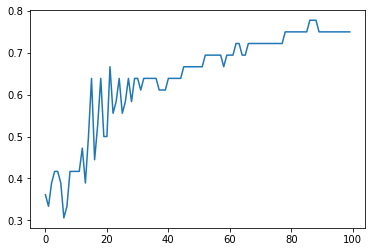

In [7]:
plt.plot(result_gcn["accuracy_test"])
plt.show()

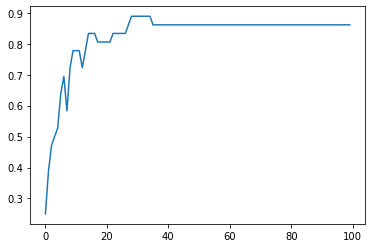

In [8]:
plt.plot(result_rgcn["accuracy_test"])
plt.show()

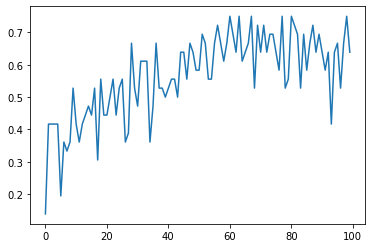

In [9]:
plt.plot(result_gat["accuracy_test"])
plt.show()